##### 데이터의 확인과 실행

In [2]:
import pandas as pd
df_pre = pd.read_csv('dataset/wine.csv', header = None)
df = df_pre.sample(frac = 1)  # frac => float

print(df.head(5))

       0     1     2    3      4     5   ...       7     8     9     10  11  12
6172  6.8  0.32  0.23  3.3  0.026  31.0  ...  0.98960  3.10  0.40  12.4   6   0
3272  6.6  0.27  0.31  5.3  0.137  35.0  ...  0.99510  3.20  0.38   9.3   5   0
2987  7.3  0.18  0.29  1.2  0.044  12.0  ...  0.99180  3.20  0.48  11.3   7   0
5044  6.6  0.15  0.32  6.0  0.033  59.0  ...  0.99192  3.19  0.71  12.1   8   0
4732  6.6  0.25  0.35  2.9  0.034  38.0  ...  0.99008  3.19  0.40  12.8   6   0

[5 rows x 13 columns]


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 6172 to 2833
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [4]:
dataset = df.values
X = dataset[:, :12]
Y = dataset[:, 12]

----------------------------------------------------------------------------

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

# 데이터 입력
df_pre = pd.read_csv('dataset/wine.csv', header = None)
df = df_pre.sample(frac = 1)
dataset = df.values
X = dataset[:, :12]
Y = dataset[:, 12]

# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim = 12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

# 모델 컴파일
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = 'accuracy')

# 모델 실행
model.fit(X, Y, 
          epochs = 200,
          batch_size = 200)

# 결과 출력
print(f'\nAccuracy : {model.evaluate(X, Y)[1]}')

Epoch 1/200
33/33 [==============================] - 3s 7ms/step - loss: 0.3833 - accuracy: 0.8529
Epoch 2/200
33/33 [==============================] - 0s 7ms/step - loss: 0.2675 - accuracy: 0.9167
Epoch 3/200
33/33 [==============================] - 0s 6ms/step - loss: 0.2416 - accuracy: 0.9200
Epoch 4/200
33/33 [==============================] - 0s 7ms/step - loss: 0.2143 - accuracy: 0.9304
Epoch 5/200
33/33 [==============================] - 0s 7ms/step - loss: 0.2019 - accuracy: 0.9318
Epoch 6/200
33/33 [==============================] - 0s 6ms/step - loss: 0.1966 - accuracy: 0.9346
Epoch 7/200
33/33 [==============================] - 0s 6ms/step - loss: 0.1914 - accuracy: 0.9341
Epoch 8/200
33/33 [==============================] - 0s 6ms/step - loss: 0.1870 - accuracy: 0.9364
Epoch 9/200
33/33 [==============================] - 0s 7ms/step - loss: 0.1843 - accuracy: 0.9366
Epoch 10/200
33/33 [==============================] - 0s 6ms/step - loss: 0.1787 - accuracy: 0.9366
Epoch 11/

##### 모델 업데이트하기

In [6]:
import os

MODEL_DIR = 'model/'                # 모델 저장 폴더

if not os.path.exists(MODEL_DIR):   # 위의 폴더가 존재하지 않으면
    os.mkdir(MODEL_DIR)             # 폴더를 만들어줌

model_path = 'model/{epoch:02d}-{val_loss:.4f}.hdf5'

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint

# 모델 저장 조건 설정
checkpointer = ModelCheckpoint(filepath = model_path, 
                               monitor = 'val_loss',
                               verbose = 1)

# 모델 실행 및 저장
model.fit(X, Y,
          validation_split = 0.2, 
          epochs = 200,
          batch_size = 200,
          verbose = 0,
          callbacks = [checkpointer])


Epoch 00001: saving model to model/01-0.0467.hdf5

Epoch 00002: saving model to model/02-0.0503.hdf5

Epoch 00003: saving model to model/03-0.0483.hdf5

Epoch 00004: saving model to model/04-0.0491.hdf5

Epoch 00005: saving model to model/05-0.0516.hdf5

Epoch 00006: saving model to model/06-0.0603.hdf5

Epoch 00007: saving model to model/07-0.0480.hdf5

Epoch 00008: saving model to model/08-0.0492.hdf5

Epoch 00009: saving model to model/09-0.0523.hdf5

Epoch 00010: saving model to model/10-0.0484.hdf5

Epoch 00011: saving model to model/11-0.0499.hdf5

Epoch 00012: saving model to model/12-0.0487.hdf5

Epoch 00013: saving model to model/13-0.0477.hdf5

Epoch 00014: saving model to model/14-0.0506.hdf5

Epoch 00015: saving model to model/15-0.0509.hdf5

Epoch 00016: saving model to model/16-0.0591.hdf5

Epoch 00017: saving model to model/17-0.0594.hdf5

Epoch 00018: saving model to model/18-0.0486.hdf5

Epoch 00019: saving model to model/19-0.0567.hdf5

Epoch 00020: saving model to m

##### 그래프로 확인하기


In [8]:
df = df_pre.sample(frac = 0.33)

history = model.fit(X, Y, 
                    validation_split = 0.33,
                    epochs = 3500,
                    batch_size = 500)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
9/9 [==============================] - 0s 19ms/step - loss: 0.0282 - accuracy: 0.9929 - val_loss: 0.0472 - val_accuracy: 0.9916
Epoch 1002/3500
9/9 [==============================] - 0s 21ms/step - loss: 0.0285 - accuracy: 0.9908 - val_loss: 0.0510 - val_accuracy: 0.9911
Epoch 1003/3500
9/9 [==============================] - 0s 17ms/step - loss: 0.0282 - accuracy: 0.9926 - val_loss: 0.0487 - val_accuracy: 0.9921
Epoch 1004/3500
9/9 [==============================] - 0s 18ms/step - loss: 0.0268 - accuracy: 0.9922 - val_loss: 0.0476 - val_accuracy: 0.9921
Epoch 1005/3500
9/9 [==============================] - 0s 15ms/step - loss: 0.0264 - accuracy: 0.9922 - val_loss: 0.0483 - val_accuracy: 0.9916
Epoch 1006/3500
9/9 [==============================] - 0s 17ms/step - loss: 0.0263 - accuracy: 0.9915 - val_loss: 0.0488 - val_accuracy: 0.9907
Epoch 1007/3500
9/9 [==============================] - 0s 18ms/step - loss: 0.0262 - accuracy: 0.9920 - val_loss: 0.

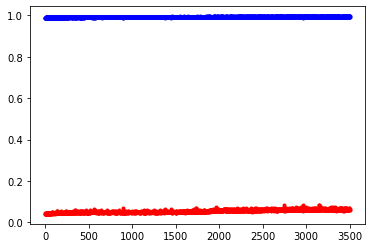

In [12]:
import matplotlib.pyplot as plt

# 결과의 오차값과 정확도의 값을 저장
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']

# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, 'o', c = 'red', markersize = 3)
plt.plot(x_len, y_acc, 'o', c = 'blue', markersize = 3)

plt.show()

##### 학습의 자동 중단

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import pandas as pd
import numpy as np
import tensorflow as tf

# seed 값 설정
np.random.seed(3)
tf.random.set_seed(3)

# 데이터 정제
df_pre = pd.read_csv('dataset/wine.csv', header = None)
df = df_pre.sample(frac = 0.15)

dataset = df.values
X = dataset[:, :12]
Y = dataset[:, 12]

# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim = 12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

# 모델 컴파일
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor = 'val_loss',
                                        patience = 100)

# 모델 업데이트 및 저장
MODEL_DIR = 'model'

if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = 'model/{epoch:02d}-{val_loss:.4f}.hdf5'

checkpointer = ModelCheckpoint(filepath = modelpath, 
                               monitor = 'val_loss',
                               verbose = 1,
                               save_best_only = True)

# 모델 실행
model.fit(X, Y, 
          validation_split = 0.2,
          epochs = 2000,
          batch_size = 500,
          callbacks = [early_stopping_callback, checkpointer])

# 결과 출력
print(f'\nAccuracy : {model.evaluate(X, Y)[1]}')

Epoch 1/2000
1/2 [==============>...............] - ETA: 1s - loss: 2.2319 - accuracy: 0.7240
Epoch 00001: val_loss improved from inf to 1.20689, saving model to model/01-1.2069.hdf5
2/2 [==============================] - 1s 381ms/step - loss: 2.0342 - accuracy: 0.7256 - val_loss: 1.2069 - val_accuracy: 0.7744
Epoch 2/2000
1/2 [==============>...............] - ETA: 0s - loss: 1.6601 - accuracy: 0.7160
Epoch 00002: val_loss improved from 1.20689 to 0.86036, saving model to model/02-0.8604.hdf5
2/2 [==============================] - 0s 106ms/step - loss: 1.5270 - accuracy: 0.7256 - val_loss: 0.8604 - val_accuracy: 0.7744
Epoch 3/2000
1/2 [==============>...............] - ETA: 0s - loss: 1.1057 - accuracy: 0.7400
Epoch 00003: val_loss improved from 0.86036 to 0.57772, saving model to model/03-0.5777.hdf5
2/2 [==============================] - 0s 114ms/step - loss: 1.0603 - accuracy: 0.7256 - val_loss: 0.5777 - val_accuracy: 0.7744
Epoch 4/2000
1/2 [==============>...............] - ETA: